<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Classification_TreeDecision_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
base = pd.read_csv('/content/xrayfull.csv')

In [6]:
base.head()

,Image Index,fold,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,train,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,train,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,train,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,train,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
base.tail()

,Image Index,fold,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
112115,00030801_001.png,train,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
112116,00030802_000.png,val,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112119,00030805_000.png,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
base['fold'] = base['fold'].apply(lambda x: 1 if x =='val' else 0)

In [9]:
base.head()

,Image Index,fold,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


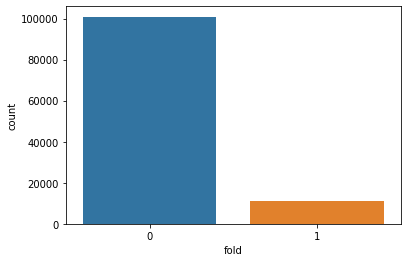

In [11]:
sns.countplot( x = base['fold']);

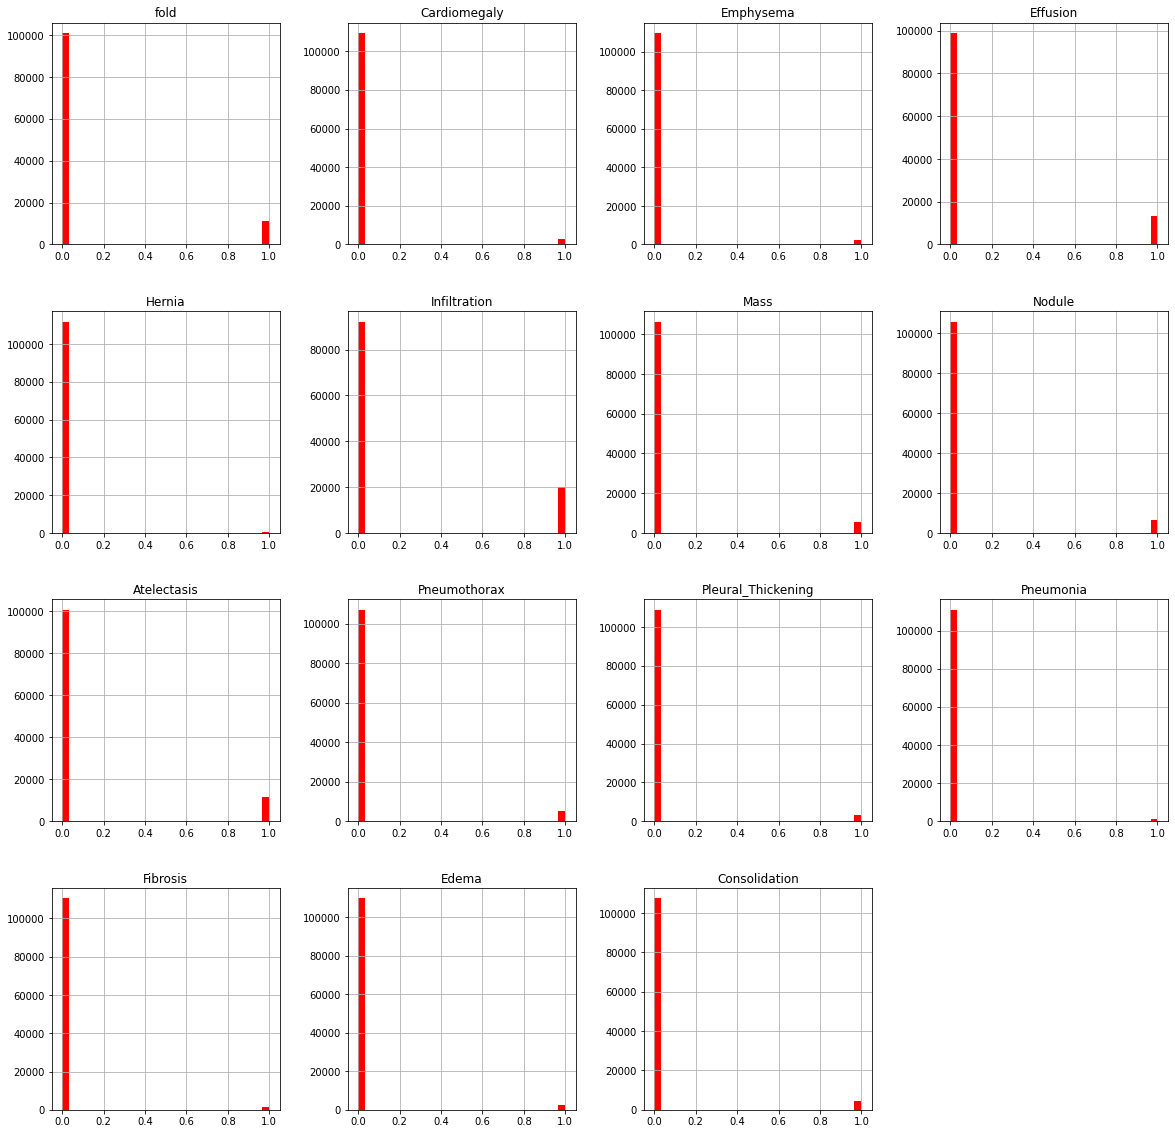

In [12]:
base.hist(bins=30, figsize=(20,20), color = 'r');

In [13]:
base.isnull().sum()

Image Index           0
fold                  0
Cardiomegaly          0
Emphysema             0
Effusion              0
Hernia                0
Infiltration          0
Mass                  0
Nodule                0
Atelectasis           0
Pneumothorax          0
Pleural_Thickening    0
Pneumonia             0
Fibrosis              0
Edema                 0
Consolidation         0
dtype: int64

In [15]:
x_base = base.iloc[:,2:15].values
y_base = base.iloc[:,1].values

In [16]:
x_base.shape

(112120, 13)

In [17]:
y_base.shape

(112120,)

Treinameto

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_base, y_base, test_size=0.25, random_state=0)

In [20]:
x_train.shape

(84090, 13)

In [21]:
y_train.shape

(84090,)

In [22]:
x_test.shape

(28030, 13)

In [23]:
y_test.shape

(28030,)

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
tree = ExtraTreesClassifier(n_estimators=50, criterion='entropy')

In [27]:
tree.fit(x_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=50)

In [28]:
pred = tree.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
accuracy_score(y_test, pred)

0.899179450588655

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
rgl = LogisticRegression()

In [33]:
rgl.fit(x_train, y_train)

LogisticRegression()

In [34]:
previsao = rgl.predict(x_test)
previsao

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
accuracy_score(y_test, previsao)

0.8993578308954692

In [37]:
from yellowbrick.classifier import ConfusionMatrix

0.8993578308954692

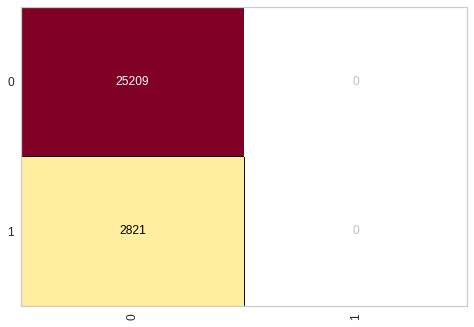

In [38]:
cm = ConfusionMatrix(rgl)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [39]:
print(classification_report(y_test,previsao))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     25209
           1       0.00      0.00      0.00      2821

    accuracy                           0.90     28030
   macro avg       0.45      0.50      0.47     28030
weighted avg       0.81      0.90      0.85     28030



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


a previsao para ser (1) é 0 devido a falta de dados no dataset, sao muito poucos casos.